## Load data

In [1]:
from LoadSplitData import Process
import numpy as np
np.random.seed(0)

Using TensorFlow backend.


In [2]:
data = Process()
data.split_data()

Images shape (24076, 80, 80, 3), label shape (24076,), ratio of authorized data 0.4503655092208008
X_train shape: (12639, 80, 80, 3)
12639 train samples
5418 valid samples
6019 test samples


## Train the model

In [3]:
from BuildModel import Model

In [4]:
FILE_PATH = r'C:\Users\dbsnail\ImageProject\models\model' #_sgd.h5'
optimizers = ['sgd', 'adam']
batch_sizes = [40, 50, 60, 70, 80, 90, 100]

model_dict = {}
for optimizer in optimizers:
    for batch_size in batch_sizes:
    
        file_path = FILE_PATH + '_' + str(batch_size) + '_' + optimizer + '.h5'
        model = Model(batch_size)
        model.build_model(data)
        model.train(data,optimizer)
        model.save(file_path)
        acc = model.evaluate(data)
        print("Optimizer: {}, batch_size: {}, test accuracy: {}".format(optimizer, batch_size, acc))
        if optimizer in model_dict.keys():
            model_dict[optimizer].append((batch_size, acc))
        else:
            model_dict[optimizer] = [(batch_size, acc)]           

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_1 (Convolution2D)  (None, 80, 80, 32)    896         convolution2d_input_1[0][0]      
____________________________________________________________________________________________________
convolution2d_2 (Convolution2D)  (None, 80, 80, 32)    9248        convolution2d_1[0][0]            
____________________________________________________________________________________________________
maxpooling2d_1 (MaxPooling2D)    (None, 40, 40, 32)    0           convolution2d_2[0][0]            
____________________________________________________________________________________________________
dropout_1 (Dropout)              (None, 40, 40, 32)    0           maxpooling2d_1[0][0]             
___________________________________________________________________________________________

## Plot the accuracy

In [5]:
import pandas as pd
import json
with open('model.txt', 'w') as outfile:
    json.dumps(model_dict, outfile) 
model_acc = pd.DataFrame(model_dict)
model_acc

,adam,sgd
0,"(40, 99.1360682747)","(40, 98.0063122231)"
1,"(50, 99.5680345236)","(50, 97.6740320144)"
2,"(60, 96.2784556539)","(60, 98.006316303)"
3,"(70, 99.1360701047)","(70, 94.0521692572)"
4,"(80, 99.4185069487)","(80, 97.3749780035)"
5,"(90, 99.3520522458)","(90, 85.2134944325)"
6,"(100, 99.4185047503)","(100, 82.7878369477)"


In [9]:
model_acc['batch_size'] = model_acc.adam.map(lambda x: x[0])
model_acc['adam_accuracy'] = model_acc.adam.map(lambda x: x[1])
model_acc['sgd_accuracy'] = model_acc.sgd.map(lambda x: x[1])

In [10]:
model_acc

,adam,sgd,batch_size,adam_accuracy,sgd_accuracy
0,"(40, 99.1360682747)","(40, 98.0063122231)",40,99.136068,98.006312
1,"(50, 99.5680345236)","(50, 97.6740320144)",50,99.568035,97.674032
2,"(60, 96.2784556539)","(60, 98.006316303)",60,96.278456,98.006316
3,"(70, 99.1360701047)","(70, 94.0521692572)",70,99.136070,94.052169
4,"(80, 99.4185069487)","(80, 97.3749780035)",80,99.418507,97.374978
5,"(90, 99.3520522458)","(90, 85.2134944325)",90,99.352052,85.213494
6,"(100, 99.4185047503)","(100, 82.7878369477)",100,99.418505,82.787837


In [11]:
import matplotlib.pyplot as plt

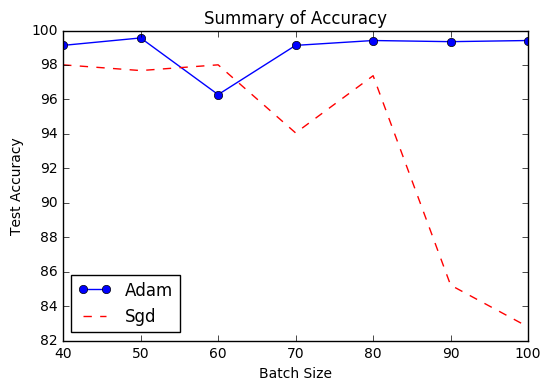

In [37]:
plt.figure()
plt.plot(model_acc.batch_size, model_acc.adam_accuracy, '-o', label = 'Adam')
plt.plot(model_acc.batch_size, model_acc.sgd_accuracy, '--r', label = 'Sgd')
plt.xlabel("Batch Size")
plt.ylabel("Test Accuracy")
plt.title("Summary of Accuracy")
plt.legend(loc=3)
plt.savefig('accuracy.png')
plt.show()